Driver script to import and pre-process the OASIS brain data.
Builds and trains the VQVAE model, generating images and SSIM accuracy of the test dataset.

@author Mallika Mukherji
@email m.mukherji@uqconnect.edu.au

In [66]:
import tensorflow as tf
import glob
import sklearn as sk
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [67]:
print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.6.0


In [68]:
# Initialise paths for training, testing and validation sets
TRAIN_IMAGE_PATH = "D:\keras_png_slices_data\keras_png_slices_train\*.png"
TEST_IMAGE_PATH = "D:\keras_png_slices_data\keras_png_slices_test\*.png"
VAL_IMAGE_PATH = "D:\keras_png_slices_data\keras_png_slices_validate\*.png"

In [69]:
# Initialise image dimensions for model
IMG_HEIGHT = 128
IMG_WIDTH = 128

In [70]:
def load_data():
    """
    Loads the datasets for training, testing and validation.
    Outputs tf.data.Dataset objects for train, test and validation datasets.
    """
    train_images = sorted(glob.glob(TRAIN_IMAGE_PATH))
    test_images = sorted(glob.glob(TEST_IMAGE_PATH))
    val_images = sorted(glob.glob(VAL_IMAGE_PATH))

    train_ds = tf.data.Dataset.from_tensor_slices(train_images)
    test_ds = tf.data.Dataset.from_tensor_slices(test_images)
    val_ds = tf.data.Dataset.from_tensor_slices(val_images)

    return train_ds, test_ds, val_ds

In [71]:
def decode_image(path):
    """
    Decodes a .png image. Outputs grayscale image with standardised
    dimension (128 x 128) and normalised pixel values.
    """
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels = 1)
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
    img = tf.cast(img, tf.float32) / 255.0
    return img

In [72]:
def process_path(image_path):
    """
    Map function for datasets. Decodes images, and reshapes
    dataset tensors for updated image dimensions.
    """
    image = decode_image(image_path)
    image = tf.reshape(image, (IMG_HEIGHT, IMG_WIDTH, 1))
    return image

In [73]:
# Pre-process the OASIS brain data.
train_ds, test_ds, val_ds = load_data()

train_ds = train_ds.map(process_path)
test_ds = test_ds.map(process_path)
val_ds = val_ds.map(process_path)

In [74]:
def display(display_list):
    """
    Displays a list of images.
    """
    plt.figure(figsize=(10,10))
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.imshow(display_list[i], cmap='gray')
        plt.axis('off')
    plt.show()

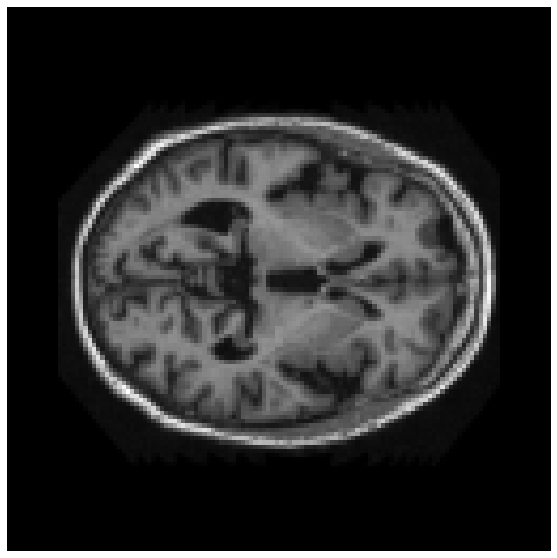

In [75]:
# Check dataset has been successfully loaded and pre-processed.
for image in train_ds.take(1):
    display([image])